# Satcen Dataset Handling

Perform any processing that may be required on the Satcen dataset.

## Add New Files

Handle the addition of newly-received images without skiffs.

### Rename the Files

In [1]:
import os
import pathlib

# path to satcen_dataset (contains "full" and "original" subfolders)
satcen_path = pathlib.Path('../satcen_dataset/').resolve()

# rename new files
for f in os.listdir(satcen_path/'full/pictures'):

    # check if file has original name
    if 'tudor' in f:
        os.rename(satcen_path/'full/pictures'/f, satcen_path/'full/pictures'/f[6:])

In [2]:
print(len(os.listdir('../airbus_dataset/train_v2')))

192556


### Construct the Labels

In [11]:
import json

# load the annotations of the original images
file = open(satcen_path/'original/SatCen_skiffs256.json')
labels = json.load(file)['batch']['annotations']

print('Original dataset')
print('Number of annotated images:', len(labels))
number_skiff_ims = len(list(filter(lambda x: len(x['objects']) > 0, labels)))
print('Number of images with at least one skiff:', number_skiff_ims)
print('Number of images without skiffs:', len(labels) - number_skiff_ims)
print('Number of images without annotations:', len(os.listdir(satcen_path/'original/pictures')) - len(labels))

# reformat original annotations
labels = list(map(lambda x: {
    'name': x['name'],
    'bounding_boxes': [box['data'] for box in x['objects']]
}, labels))

# new images do not contain any ships, add bounding_boxes: []
# for the corresponding entry in the labels list
# new images contain "chip" in the beginning of the filename
pictures = os.listdir(satcen_path/'full/pictures')
for f in pictures:

    # new image
    if 'chip' in f:
        labels.append({
            'name': f,
            'bounding_boxes': []
        })

# calculate number of positive and negative observations
no_pos_obs = len(list(filter(lambda x: len(x['bounding_boxes']) > 0, labels)))
no_neg_obs = len(list(filter(lambda x: len(x['bounding_boxes']) == 0, labels)))

# print stats
print()
print(f'Total number of labels: {len(labels)}')
print(f'Positive observations: {no_pos_obs}')
print(f'Negative observations: {no_neg_obs}')

# save json
labels_path = satcen_path/'full/labels.json'

# delete if already exists
if 'labels.json' in os.listdir():
    os.remove(labels_path)

# write to file
with open(labels_path, 'w') as f:
    json.dump(labels, f)

Original dataset
Number of annotated images: 1833
Number of images with at least one skiff: 1525
Number of images without skiffs: 308
Number of images without annotations: 337

Total number of labels: 9420
Positive observations: 1525
Negative observations: 7895


In [6]:
total_bb = 0

for i, example in enumerate(labels):
    total_bb += len(example['bounding_boxes'])
print(total_bb)

30722


In [3]:
print(labels[0])

{'name': '272-512-0.png', 'bounding_boxes': [[{'x': 33, 'y': 154}, {'x': 32, 'y': 175}, {'x': 42, 'y': 176}, {'x': 45, 'y': 154}], [{'x': 18, 'y': 124}, {'x': 17, 'y': 147}, {'x': 29, 'y': 149}, {'x': 31, 'y': 129}], [{'x': 67, 'y': 129}, {'x': 54, 'y': 147}, {'x': 61, 'y': 151}, {'x': 74, 'y': 138}], [{'x': 64, 'y': 125}, {'x': 48, 'y': 138}, {'x': 55, 'y': 145}, {'x': 70, 'y': 134}], [{'x': 50, 'y': 112}, {'x': 40, 'y': 131}, {'x': 51, 'y': 138}, {'x': 60, 'y': 119}], [{'x': 43, 'y': 104}, {'x': 32, 'y': 122}, {'x': 42, 'y': 126}, {'x': 52, 'y': 108}], [{'x': 36, 'y': 100}, {'x': 24, 'y': 117}, {'x': 32, 'y': 123}, {'x': 45, 'y': 106}], [{'x': 51, 'y': 196}, {'x': 30, 'y': 196}, {'x': 31, 'y': 208}, {'x': 51, 'y': 208}], [{'x': 31, 'y': 203}, {'x': 9, 'y': 202}, {'x': 9, 'y': 215}, {'x': 32, 'y': 215}], [{'x': 50, 'y': 208}, {'x': 31, 'y': 205}, {'x': 29, 'y': 216}, {'x': 51, 'y': 219}], [{'x': 34, 'y': 217}, {'x': 57, 'y': 220}, {'x': 54, 'y': 233}, {'x': 33, 'y': 229}], [{'x': 31, 

### Remove Images that Are Not Annotated

In [12]:
# extract file names from the labels
annotated_images = list(map(lambda x: x['name'], labels))
print(f'Number of annotations: {len(annotated_images)}')

# loop through the images in the satcen_dataset/full/pictures folder
all_images = os.listdir(satcen_path/'full/pictures')
for img in all_images:

    # check if image is annotated
    if img not in annotated_images:

        # remove image
        os.remove(satcen_path/f'full/pictures/{img}')

print(f'Total number of images (pictures folder): {len(os.listdir(satcen_path/"full/pictures"))}')

Number of annotations: 9420
Total number of images (pictures folder): 9420


### Show Examples of Images that Do Not Have Annotations

Number of annotations: 1833
Total number of images: 2170
False


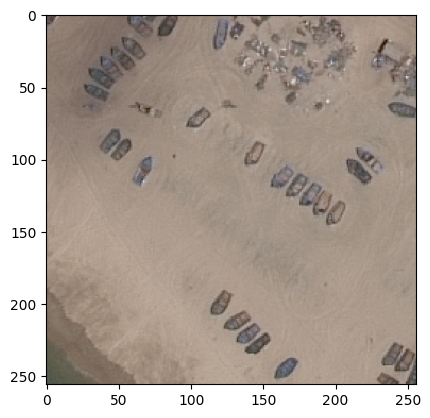

In [17]:
import json
import matplotlib.pyplot as plt
from PIL import Image

file = open(satcen_path/'original/SatCen_skiffs256.json')
labels = json.load(file)['batch']['annotations']

annotated_images = list(map(lambda x: x['name'], labels))
all_images = os.listdir(satcen_path/'original/pictures')

print(f'Number of annotations: {len(annotated_images)}')
print(f'Total number of images: {len(all_images)}')

not_annotated_images = list(set(all_images) - set(annotated_images))
test_img = not_annotated_images[1]
print(test_img in annotated_images)

plt.imshow(Image.open(satcen_path/'original/pictures'/not_annotated_images[1]))
plt.show()